# 11.2

In [121]:
import sys
sys.path.insert(0, "/home/masvgp/dev/byu_num_lin_alg_2022/src/")

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from factorizations.householder import house, formQ

In [122]:
def lsqr(A, b):
    """Solve the least squares problem given a linear system Ax = b with A m x n, m > n.

    Args:
        A (arr): An m x n matrix A with m > n
        b (arr): A vector of length m
    Returns:
        x (arr): The optimal solution vector x
    """
    # Get dim(A)
    m = A.shape[0]
    n = A.shape[1]
    
    # Check if A has m > n
    if m <= n:
        raise ValueError("A is not of appropriate dimensions. Should be m x n, m > n.")
    # Check that A and b have same number of rows.
    if len(b) != len(A):
        raise ValueError("Number of rows of A must match number of rows of b.")

    # Cast A as type np.float64
    A = A.astype(np.float64)

    # Compute the full QR factorization of A
    R, W = house(A)
    Q = formQ(W)

    # Get the reduced QR factorization of A from the full factorization
    # And ditch the 0 rows of R
    R_hat = R[:n, :n]
    Q_hat = Q[:m, :n]
    
    # Compute Q^*b
    Q_hat_star_b = np.array(np.asmatrix(Q_hat).H) @ b
    
    # Solve upper-triangular R_hat@x = Q_hat_star_b for x. In this case, I will use Gauss-Seidel
    # To solve the system
    # x_result = gauss_seidel(R_hat, Q_hat_star_b, x_start=np.zeros(len(Q_hat_star_b)))
    x_hat = np.linalg.solve(R_hat, Q_hat_star_b)

    # Compute ssd
    ssr = np.linalg.norm(A @ x_hat  -  b)

    return (A @ x_hat), x_hat, ssr





# 11.2 (a)

Suppose we want to estimate via least squares $y = f(x) = 1/x$ on the interval $[1, 2]$ using a linear combination of $e^x$, $\sin x$, and $\Gamma(x)$. Then we can form a design matrix containing samples of these functions as columns, that is, we may form the matrix $X = [e^x | \sin x | \Gamma(x)]$ such that $x$ consists of linearly spaced points in the interval $[1, 2]$. Then we may define the $y=Xx$. We solve this using least squares to find the optimal estimate $\hat{y}$ corresponding to the solution $\hat{x}$ of the system of equations. With a sum of squared error clost to 0, the fit appears to be very good.

In [123]:
x = np.linspace(1, 2, 20)
y = 1/x

In [124]:
e = np.exp(x)
sin_x = np.sin(x)
gamma = sp.special.gamma(x)
X = np.array([e, sin_x, gamma]).T


In [125]:
y_hat, x_hat, ssr = lsqr(X, y)

In [126]:
print("y_hat: " + str(b_hat))
print("x_hat: " + str(x_hat))
print("Sum of squared errors: " + str(ssr))

y_hat: [0.66666763 1.83333377 3.16666903 3.99999986]
x_hat: [-0.10769069  0.01013855  1.28575148]
Sum of squared errors: 0.0027912911180240853


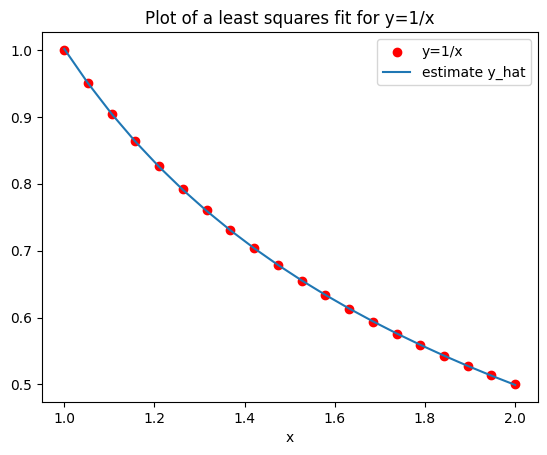

In [127]:
# Plot the results
plt.scatter(x, y, color='red', label='y=1/x')
plt.plot(x, y_hat, label='estimate y_hat')
plt.xlabel("x")
plt.legend()
plt.title("Plot of a least squares fit for y=1/x")
plt.show()


# 11.2 (b)

In [128]:
x = np.linspace(0.001, 1, 60)
y = 1/x
e = np.exp(x)
sin_x = np.sin(x)
gamma = sp.special.gamma(x)
X = np.array([e, sin_x, gamma]).T

In [129]:
y_hat, x_hat, ssr = lsqr(X, y)

In [130]:
print("y_hat: " + str(b_hat))
print("x_hat: " + str(x_hat))
print("Sum of squared errors: " + str(ssr))

y_hat: [0.66666763 1.83333377 3.16666903 3.99999986]
x_hat: [ 0.63101588 -1.838535    0.99994246]
Sum of squared errors: 0.4561267020208506


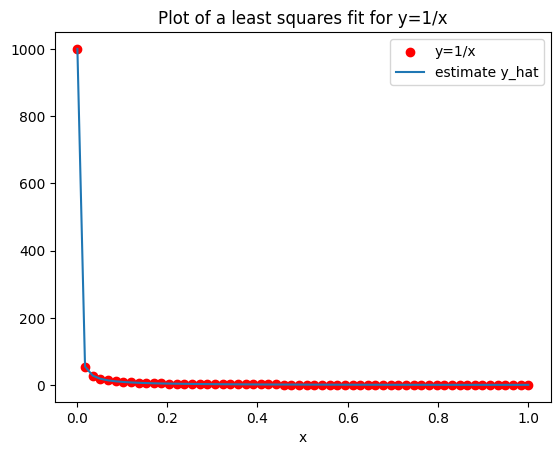

In [131]:
# Plot the results
plt.scatter(x, y, color='red', label='y=1/x')
plt.plot(x, y_hat, label='estimate y_hat')
plt.xlabel("x")
plt.legend()
plt.title("Plot of a least squares fit for y=1/x")
plt.show()

In [132]:
# Intial test of lsqr function
A = np.array([[1, 2, 1], [4, 5, 6], [6, 9, 8], [5, 4, 3]])
b = np.array([1, 2, 3, 4])
b_hat, x_hat, ssr = lsqr(A, b)
print("b_hat: " + str(b_hat))
print("x_hat: " + str(x_hat))
print("Sum of squared errors: " + str(ssr))



b_hat: [0.66666763 1.83333377 3.16666903 3.99999986]
x_hat: [ 1.01851794  0.01851945 -0.3888892 ]
Sum of squared errors: 0.4082482904720687
